<a href="https://colab.research.google.com/github/AfrahJaber/T5WEEK4/blob/main/2Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [2]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 62.1MB/s]
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=['date_time'], index_col=['date_time'])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [4]:
print(df.columns)

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [7]:
#df['traffic_volume']=df['traffic_volume'].fillna(df['traffic_volume'].mode()[0])

In [8]:
df['traffic_volume'].fillna(method='ffill', inplace=True)

<ipython-input-8-00956f0c7949>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['traffic_volume'].fillna(method='ffill', inplace=True)


In [9]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [10]:
df['traffic_volume'] = df['traffic_volume'].astype(int)

In [11]:
df.duplicated().sum()

18

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

<Axes: xlabel='date_time'>

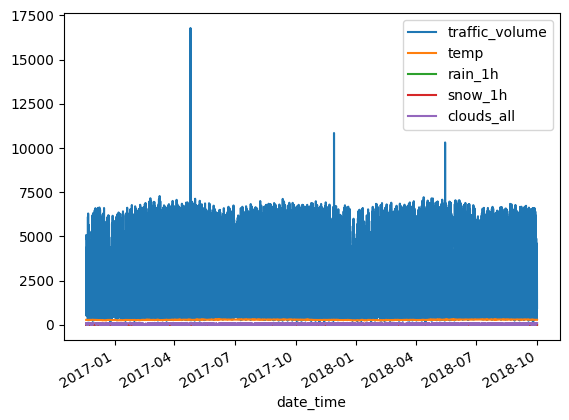

In [14]:
df.plot()

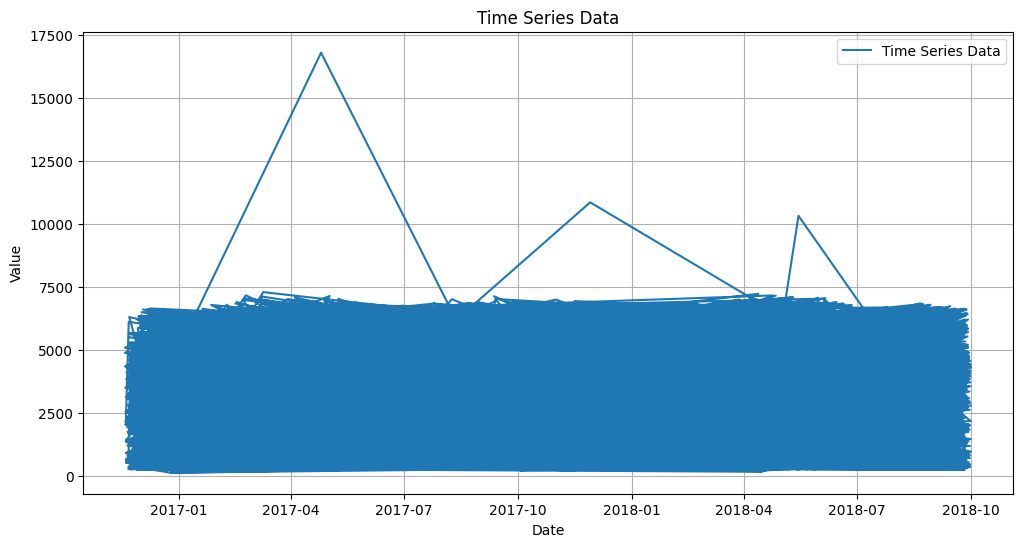

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['traffic_volume'], label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

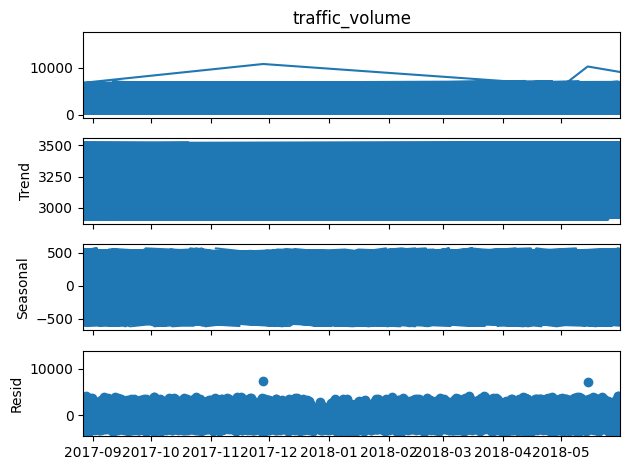

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)
result.plot()
plt.show()

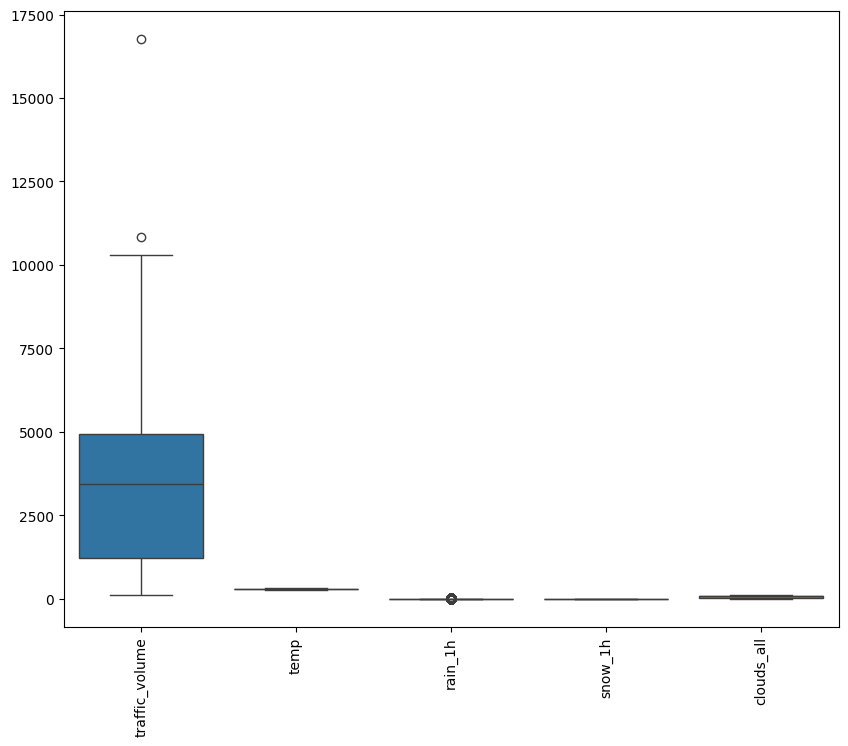

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'traffic_volume')

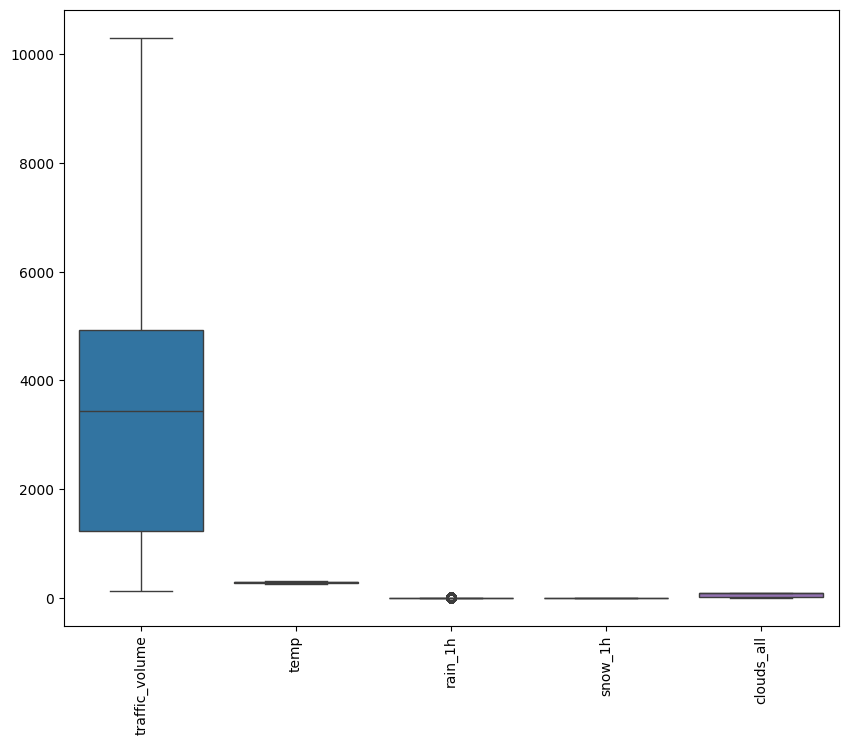

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

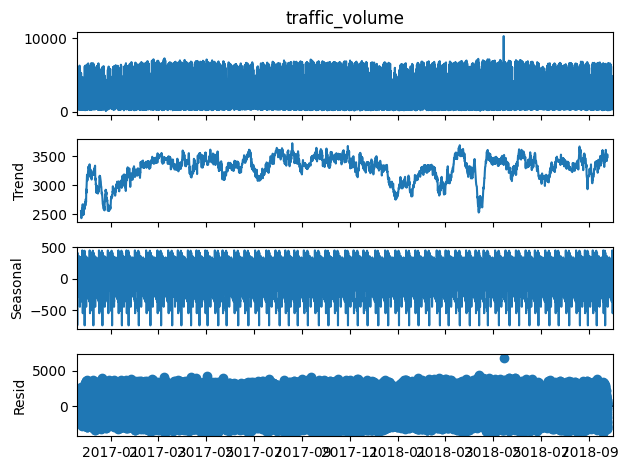

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)
result.plot()
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [20]:
df['rain_1h'] = df['rain_1h'].astype(int)
df['snow_1h'] = df['snow_1h'].astype(int)
df['temp']=df['temp'].astype(int)

<ipython-input-20-c3c3f7adbf88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rain_1h'] = df['rain_1h'].astype(int)
<ipython-input-20-c3c3f7adbf88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snow_1h'] = df['snow_1h'].astype(int)
<ipython-input-20-c3c3f7adbf88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19980 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   traffic_volume       19980 non-null  int64 
 1   temp                 19980 non-null  int64 
 2   rain_1h              19980 non-null  int64 
 3   snow_1h              19980 non-null  int64 
 4   clouds_all           19980 non-null  int64 
 5   weather_main         19980 non-null  object
 6   weather_description  19980 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.2+ MB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['weather_main'] = le.fit_transform(df['weather_main'])
df['weather_description'] = le.fit_transform(df['weather_description'])


<ipython-input-22-8ce293035eb7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather_main'] = le.fit_transform(df['weather_main'])
<ipython-input-22-8ce293035eb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weather_description'] = le.fit_transform(df['weather_description'])


In [23]:
df.sort_index(inplace=True)

<ipython-input-23-937e54797a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


In [24]:
df_resampled = df.resample('H').mean()

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [25]:
#Shift Method
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)

<ipython-input-25-cbc7f4a6aa26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_traffic_volume'] = df['traffic_volume'].shift(24)


In [26]:
df['prev_traffic_volume'].fillna(df['prev_traffic_volume'].mean(), inplace=True)

<ipython-input-26-3d2010552837>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_traffic_volume'].fillna(df['prev_traffic_volume'].mean(), inplace=True)


In [27]:
#Difference between traffic_volume
df['traffic_volume_diff'] = df['traffic_volume'].diff()

<ipython-input-27-14282b9924b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_diff'] = df['traffic_volume'].diff()


In [28]:
df['traffic_volume_diff'].fillna(0, inplace=True)

<ipython-input-28-2c7b439d8678>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_diff'].fillna(0, inplace=True)


In [29]:
#Date Features
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear

<ipython-input-29-7b1e04a2beac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df.index.dayofweek
<ipython-input-29-7b1e04a2beac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
<ipython-input-29-7b1e04a2beac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [30]:
X=df.drop('traffic_volume', axis=1)
y=df['traffic_volume']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_pre= scaler.fit_transform(np.array(X_train).reshape(-1, 1))
val_pre = scaler.transform(np.array(X_val).reshape(-1,1))
test_pre = scaler.transform(np.array(X_test).reshape(-1,1))

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [62]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Initialize the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=100, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, activation='tanh', return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=100, activation='tanh'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
model_lstm.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 11, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 11, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 11, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 11, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
#Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [119]:
# Train the model
history_lstm = model_lstm.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_val_scaled, y_val), batch_size=32, verbose=1)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - loss: 11917303.0000 - mae: 2861.1970 - val_loss: 11755498.0000 - val_mae: 2793.7021
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - loss: 11656143.0000 - mae: 2824.5278 - val_loss: 11545818.0000 - val_mae: 2764.8198
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - loss: 11514581.0000 - mae: 2803.6858 - val_loss: 11339130.0000 - val_mae: 2736.9370
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - loss: 11448078.0000 - mae: 2792.7021 - val_loss: 11135943.0000 - val_mae: 2709.8721
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 11026265.0000 - mae: 2734.2153 - val_loss: 10935549.0000 - val_mae: 2683.4016
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 10819207.0000 - mae: 2706.0186 - val_loss: 10737938.0000 - val_mae: 2657.6006
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 10617567.0000 - mae: 2672.8284 - val_loss: 10544073.0000 - val_mae: 2632.5969
Epoch 8/20
400/400 ━

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [143]:
import tensorflow as tf

# Enable NumPy behavior on Tensors
tf.experimental.numpy.experimental_enable_numpy_behavior()

# Now you can use reshape on EagerTensors
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_pred = LT.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [144]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.05309714923393416


<Axes: >

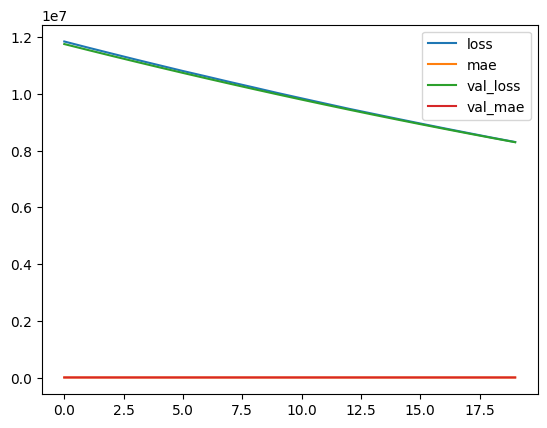

In [146]:
pd.DataFrame(history_lstm.history).plot()


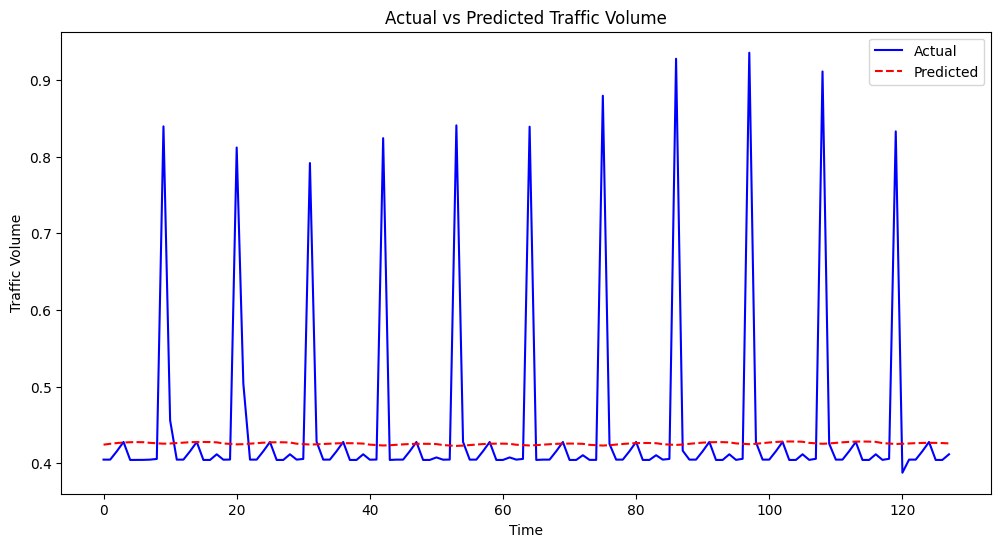

In [148]:
import matplotlib.pyplot as plt

# Convert y_test to numpy array if it's not already
y_test = np.array(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', linestyle='--', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()


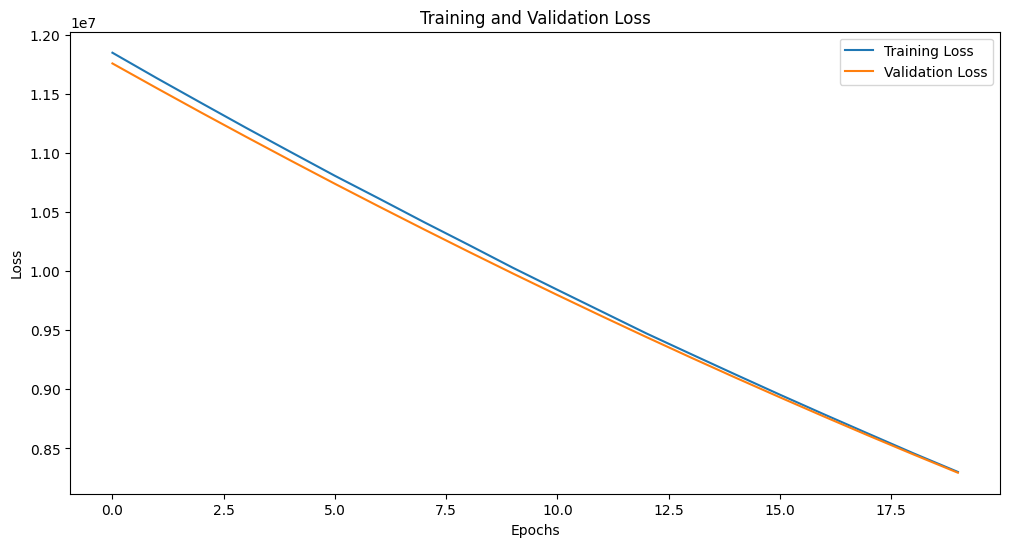

In [149]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [92]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

# Initialize a sequential model
gru_model = Sequential()

# First GRU layer
gru_model.add(GRU(units=100, activation='tanh', return_sequences=True, input_shape=(X_train_gru.shape[1], X_train_gru.shape[2])))
gru_model.add(Dropout(0.2))

# Second GRU layer
gru_model.add(GRU(units=100, activation='tanh', return_sequences=True))
gru_model.add(Dropout(0.2))

# Third GRU layer
gru_model.add(GRU(units=100, activation='tanh'))
gru_model.add(Dropout(0.2))

# Output layer
gru_model.add(Dense(units=1))

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Print model summary
gru_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 11, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 11, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 11, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 11, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,201 (594.54 KB)

 Trainable params: 152,201 (594.54 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history_gru = gru_model.fit(X_train_gru, y_train, validation_data=(X_val_gru, y_val), epochs=10, batch_size=32, verbose=1)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - loss: 14513766.0000 - mae: 3256.0007 - val_loss: 14207173.0000 - val_mae: 3175.8486
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - loss: 14252625.0000 - mae: 3220.1768 - val_loss: 13954811.0000 - val_mae: 3135.8665
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 14017470.0000 - mae: 3187.7375 - val_loss: 13708195.0000 - val_mae: 3096.2896
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 13599532.0000 - mae: 3115.1787 - val_loss: 13466337.0000 - val_mae: 3057.0266
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 13391981.0000 - mae: 3089.8000 - val_loss: 13228193.0000 - val_mae: 3017.9922
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 13234513.0000 - mae: 3052.1035 - val_loss: 12994121.0000 - val_mae: 2979.3647
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 12791757.0000 - mae: 2987.1389 - val_loss: 12763927.0000 - val_mae: 2942.1089
Epoch 8/10
400/400 ━

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [154]:
X_test_gru = reshape_data(test_pre)

In [155]:
import numpy as np
y_pred_gru = y_pred_gru.flatten()

In [156]:
import pandas as pd
import tensorflow as tf

y_pred_gru = gru_model.predict(X_test_gru)


y_pred_gru = y_pred_gru[:len(y_test)]

predictions_df = pd.DataFrame({
    'Date': df.index[-len(y_test):],
    'Actual': tf.reshape(y_test, [-1]),
    'Predicted': y_pred_gru.flatten()
})

predictions_df.to_csv('gru_predictions.csv', index=False)

print(predictions_df.head())

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                 Date  Actual  Predicted
0 2018-05-19 04:00:00    6672  79.347061
1 2018-05-19 05:00:00    4718  79.346924
2 2018-05-19 06:00:00    2848  79.346924
3 2018-05-19 07:00:00    2231  79.346924
4 2018-05-19 08:00:00     347  79.346924


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru = np.sqrt(mse_gru)

print(f'GRU - Mean Squared Error (MSE): {mse_gru}')


GRU - Mean Squared Error (MSE): 14268240.54595827


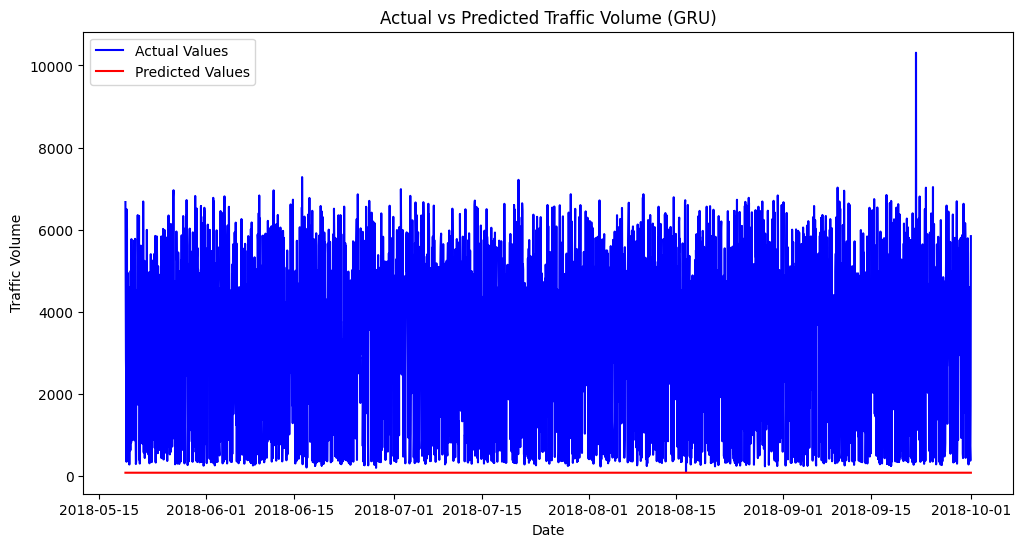

In [160]:
time_index = df.index[-len(y_test):]
y_pred_gru_flat = y_pred_gru.flatten()
y_test_flat = np.array(y_test).flatten()
df_test_gru = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_gru_flat}, index=time_index)

plt.figure(figsize=(12, 6))
plt.plot(df_test_gru.index, df_test_gru['Actual'], label='Actual Values', color='blue')
plt.plot(df_test_gru.index, df_test_gru['Predicted'], label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume (GRU)')
plt.legend()
plt.show()


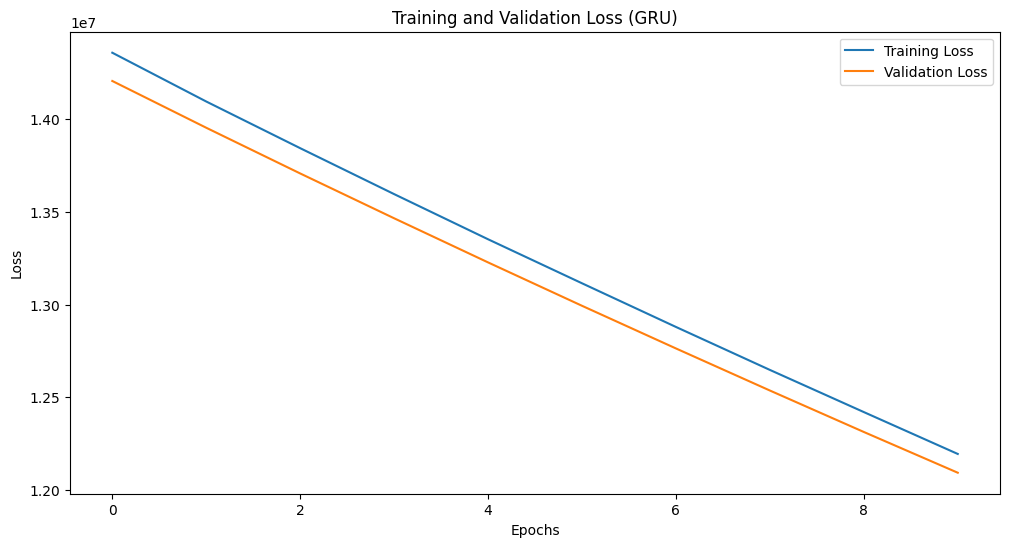

In [161]:
# Plot Loss and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (GRU)')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1.Forward Fill:
It is a method of filling in missing values ​​in temporal data using the last known value.
Its benefits are that it maintains timelines, improves forecasting, and is easy to implement